## Persistency of Drug

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')

In [4]:
df.sample(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
728,P729,Persistent,Female,Caucasian,Not Hispanic,South,65-75,ONCOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,3
3174,P3175,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,N,N,N,N,N,N,2
1362,P1363,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
317,P318,Persistent,Female,Caucasian,Not Hispanic,South,>75,ONCOLOGY,Specialist,Endo/Onc/Uro,...,N,N,N,N,N,N,N,N,N,0
793,P794,Non-Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [12]:
df.shape

(3424, 69)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [19]:
df.corr(numeric_only=True)

,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.013964
Count_Of_Risks,0.013964,1.000000


In [21]:
df.drop(columns=['Ptid'],inplace=True)

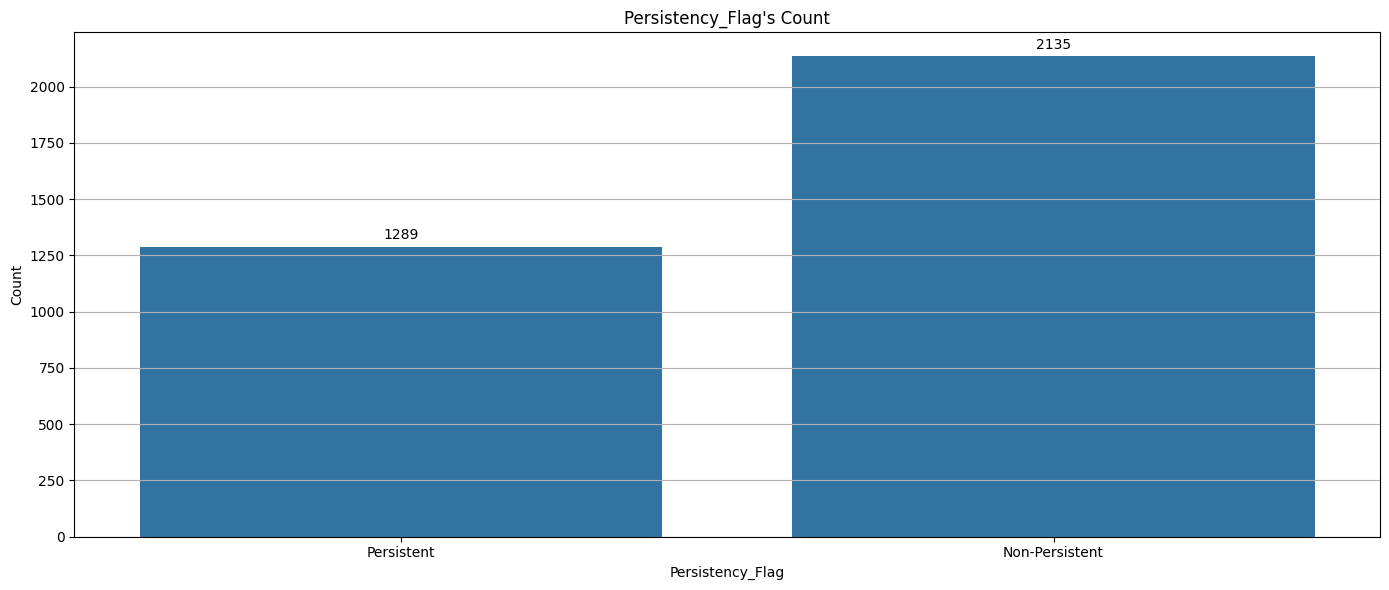

In [33]:
plt.figure(figsize=(14,6))
plt.title("Persistency_Flag's Count")
count = sns.countplot(data=df, x='Persistency_Flag')
plt.ylabel("Count")
plt.grid(axis='y')
plt.xlabel("Persistency_Flag")

for container in count.containers:
    count.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

plt.tight_layout()
plt.show()

### Data Cleaning & Feature Engineering

In [42]:
df.isnull().mean()*100

Ptid                              0.0
Persistency_Flag                  0.0
Gender                            0.0
Race                              0.0
Ethnicity                         0.0
                                 ... 
Risk_Hysterectomy_Oophorectomy    0.0
Risk_Estrogen_Deficiency          0.0
Risk_Immobilization               0.0
Risk_Recurring_Falls              0.0
Count_Of_Risks                    0.0
Length: 69, dtype: float64

In [8]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [9]:
# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("\n")

Categorical columns: ['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', '

#### Feature Engineering Steps

In [10]:
# 1. Encode categorical variables
from sklearn.preprocessing import OneHotEncoder

encoder =  OneHotEncoder(sparse_output=False)

for col in categorical_cols:
    encoded_col = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_col, columns=df.columns)
    


ValueError: Shape of passed values is (3424, 3424), indices imply (3424, 69)

In [47]:
# 1. Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a copy for feature engineering
df_processed = df.copy()

# Label encode categorical columns
label_encoders = {}
for col in categorical_cols:
    if col != 'Persistency_Flag':  # Don't encode target variable yet
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nCategorical encoding completed!")

Encoded Ptid: {'P1': np.int64(0), 'P10': np.int64(1), 'P100': np.int64(2), 'P1000': np.int64(3), 'P1001': np.int64(4), 'P1002': np.int64(5), 'P1003': np.int64(6), 'P1004': np.int64(7), 'P1005': np.int64(8), 'P1006': np.int64(9), 'P1007': np.int64(10), 'P1008': np.int64(11), 'P1009': np.int64(12), 'P101': np.int64(13), 'P1010': np.int64(14), 'P1011': np.int64(15), 'P1012': np.int64(16), 'P1013': np.int64(17), 'P1014': np.int64(18), 'P1015': np.int64(19), 'P1016': np.int64(20), 'P1017': np.int64(21), 'P1018': np.int64(22), 'P1019': np.int64(23), 'P102': np.int64(24), 'P1020': np.int64(25), 'P1021': np.int64(26), 'P1022': np.int64(27), 'P1023': np.int64(28), 'P1024': np.int64(29), 'P1025': np.int64(30), 'P1026': np.int64(31), 'P1027': np.int64(32), 'P1028': np.int64(33), 'P1029': np.int64(34), 'P103': np.int64(35), 'P1030': np.int64(36), 'P1031': np.int64(37), 'P1032': np.int64(38), 'P1033': np.int64(39), 'P1034': np.int64(40), 'P1035': np.int64(41), 'P1036': np.int64(42), 'P1037': np.int

In [48]:
# 2. Create age groups (assuming there's an age column)
if 'Age' in df_processed.columns:
    df_processed['Age_Group'] = pd.cut(df_processed['Age'], 
                                     bins=[0, 30, 45, 60, 75, 100], 
                                     labels=['Young', 'Adult', 'Middle_Aged', 'Senior', 'Elderly'])
    print("Age groups created:")
    print(df_processed['Age_Group'].value_counts())
else:
    print("Age column not found in dataset")

Age column not found in dataset


In [50]:
# 3. Create risk score features from risk-related columns
# Filter only binary risk columns (Y/N format)
binary_risk_columns = [col for col in df_processed.columns if 'Risk_' in col and 
                      df_processed[col].dtype == 'object' and 
                      set(df_processed[col].unique()).issubset({'Y', 'N'})]

print(f"Found {len(binary_risk_columns)} binary risk columns:")
print(binary_risk_columns[:10])  # Show first 10

if binary_risk_columns:
    # Convert Y/N to 1/0 for binary risk columns
    for col in binary_risk_columns:
        df_processed[col + '_numeric'] = df_processed[col].map({'Y': 1, 'N': 0})
    
    # Calculate total risk score using numeric columns
    numeric_risk_cols = [col + '_numeric' for col in binary_risk_columns]
    df_processed['Total_Risk_Score'] = df_processed[numeric_risk_cols].sum(axis=1)
    
    # Create risk categories
    df_processed['Risk_Category'] = pd.cut(df_processed['Total_Risk_Score'], 
                                         bins=[-1, 0, 2, 5, float('inf')], 
                                         labels=['No_Risk', 'Low_Risk', 'Medium_Risk', 'High_Risk'])
    
    print(f"\nRisk score distribution:")
    print(df_processed['Total_Risk_Score'].describe())
    print(f"\nRisk category distribution:")
    print(df_processed['Risk_Category'].value_counts())

Found 19 binary risk columns:
['Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco', 'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease']

Risk score distribution:
count    3424.000000
mean        1.239486
std         1.094914
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Total_Risk_Score, dtype: float64

Risk category distribution:
Risk_Category
Low_Risk       2023
No_Risk         970
Medium_Risk     423
High_Risk         8
Name: count, dtype: int64


In [51]:
# 4. Create interaction features
# Gender-Age interaction (if both exist)
if 'Gender_encoded' in df_processed.columns and 'Age' in df_processed.columns:
    df_processed['Gender_Age_Interaction'] = df_processed['Gender_encoded'] * df_processed['Age']

# Risk-Gender interaction
if 'Gender_encoded' in df_processed.columns and 'Total_Risk_Score' in df_processed.columns:
    df_processed['Risk_Gender_Interaction'] = df_processed['Total_Risk_Score'] * df_processed['Gender_encoded']

print("Interaction features created!")

Interaction features created!


In [52]:
# 5. Feature scaling and normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns for scaling
numerical_cols_for_scaling = df_processed.select_dtypes(include=[np.number]).columns
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col != 'Persistency_Flag']

print(f"Numerical columns to be scaled: {len(numerical_cols_for_scaling)}")

# Create scaled versions
scaler = StandardScaler()
df_scaled = df_processed.copy()

# Scale numerical features
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(df_processed[numerical_cols_for_scaling])

print("Feature scaling completed!")

Numerical columns to be scaled: 89
Feature scaling completed!


In [53]:
# 6. Outlier detection and handling
from scipy import stats

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Check for outliers in key numerical columns
outlier_summary = {}
for col in ['Age', 'Total_Risk_Score'] if 'Age' in df_processed.columns and 'Total_Risk_Score' in df_processed.columns else []:
    outliers = detect_outliers_iqr(df_processed, col)
    outlier_summary[col] = outliers.sum()
    print(f"Outliers in {col}: {outliers.sum()} ({outliers.mean()*100:.2f}%)")

print(f"\nOutlier summary: {outlier_summary}")


Outlier summary: {}


In [54]:
# 7. Feature Selection and Final Dataset Preparation
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Prepare final dataset
df_final = df_scaled.copy()

# Drop original categorical columns (keep encoded versions)
columns_to_drop = [col for col in categorical_cols if col != 'Persistency_Flag']
df_final = df_final.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target
X = df_final.drop(['Persistency_Flag'], axis=1)
y = df_final['Persistency_Flag']

print(f"Final dataset shape: {df_final.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget distribution:")
print(y.value_counts(normalize=True))

Final dataset shape: (3424, 91)
Features shape: (3424, 90)
Target shape: (3424,)

Feature columns: ['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'Ptid_encoded', 'Gender_encoded', 'Race_encoded', 'Ethnicity_encoded', 'Region_encoded', 'Age_Bucket_encoded', 'Ntm_Speciality_encoded', 'Ntm_Specialist_Flag_encoded', 'Ntm_Speciality_Bucket_encoded', 'Gluco_Record_Prior_Ntm_encoded', 'Gluco_Record_During_Rx_encoded', 'Dexa_During_Rx_encoded', 'Frag_Frac_Prior_Ntm_encoded', 'Frag_Frac_During_Rx_encoded', 'Risk_Segment_Prior_Ntm_encoded', 'Tscore_Bucket_Prior_Ntm_encoded', 'Risk_Segment_During_Rx_encoded', 'Tscore_Bucket_During_Rx_encoded', 'Change_T_Score_encoded', 'Change_Risk_Segment_encoded', 'Adherent_Flag_encoded', 'Idn_Indicator_encoded', 'Injectable_Experience_During_Rx_encoded', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_encoded', 'Comorb_Encounter_For_Immunization_encoded', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_encoded', 'Comorb_Vitamin_D_Deficiency

Analyzing correlations for 89 numeric features
Top 10 features correlated with target:
Dexa_During_Rx_encoded                                                     0.491823
Comorb_Long_Term_Current_Drug_Therapy_encoded                              0.352760
Dexa_Freq_During_Rx                                                        0.335235
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_encoded             0.322320
Comorb_Encounter_For_Immunization_encoded                                  0.314887
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_encoded    0.289828
Comorb_Other_Disorders_Of_Bone_Density_And_Structure_encoded               0.247283
Concom_Systemic_Corticosteroids_Plain_encoded                              0.242854
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_encoded               0.233279
Concom_Anaesthetics_General_encoded                                        0.222293
dtype: float64


C:\Users\keval\AppData\Local\Temp\ipykernel_7520\3280412993.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Target'] = y_numeric


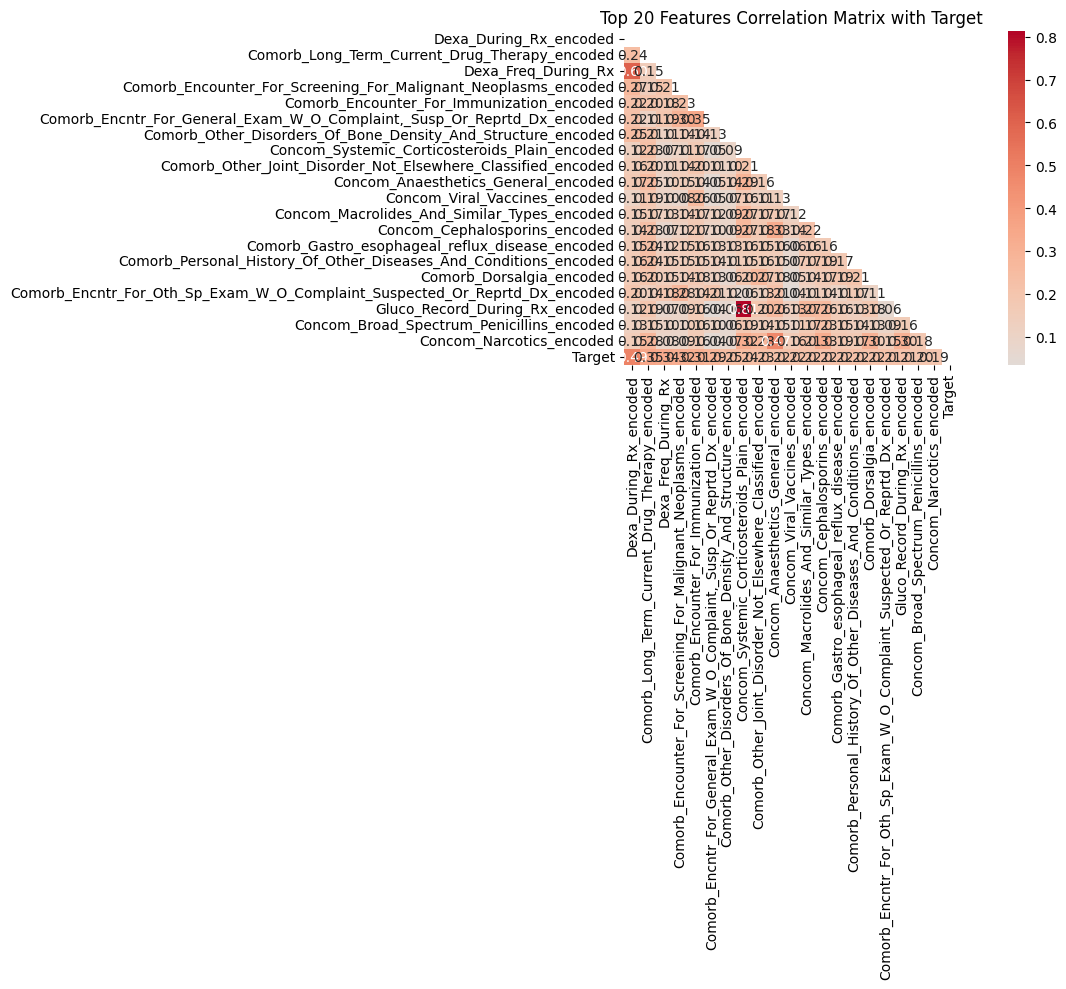

In [56]:
# 8. Correlation Analysis and Feature Importance
# Convert target to numeric for correlation analysis
y_numeric = y.map({'Persistent': 1, 'Non-Persistent': 0})

# Select only numeric columns for correlation analysis
numeric_features = X.select_dtypes(include=[np.number])
print(f"Analyzing correlations for {len(numeric_features.columns)} numeric features")

# Calculate correlation with target variable
target_correlations = numeric_features.corrwith(y_numeric)
target_correlations = target_correlations.abs().sort_values(ascending=False)

print("Top 10 features correlated with target:")
print(target_correlations.head(10))

# Visualize correlation matrix (subset of features for readability)
plt.figure(figsize=(15, 10))
top_features = target_correlations.head(20).index.tolist()
subset_data = numeric_features[top_features]
subset_data['Target'] = y_numeric

correlation_matrix = subset_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True)
plt.title('Top 20 Features Correlation Matrix with Target')
plt.tight_layout()
plt.show()

In [57]:
# 9. Data Quality Summary
print("=== DATA CLEANING & FEATURE ENGINEERING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {df_final.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

print(f"\nData Quality Checks:")
print(f"- Missing values: {df_final.isnull().sum().sum()}")
print(f"- Duplicate rows: {df_final.duplicated().sum()}")
print(f"- Infinite values: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")

print(f"\nFeature Engineering Summary:")
print(f"- Categorical variables encoded: {len(label_encoders)}")
print(f"- New features created: Age groups, Risk scores, Interaction features")
print(f"- Features scaled: {len(numerical_cols_for_scaling)}")

print(f"\nDataset is ready for machine learning modeling!")

=== DATA CLEANING & FEATURE ENGINEERING SUMMARY ===
Original dataset shape: (3424, 69)
Final processed dataset shape: (3424, 91)
Number of features: 90
Number of samples: 3424

Data Quality Checks:
- Missing values: 0
- Duplicate rows: 0
- Infinite values: 0

Feature Engineering Summary:
- Categorical variables encoded: 66
- New features created: Age groups, Risk scores, Interaction features
- Features scaled: 89

Dataset is ready for machine learning modeling!
